## Explore

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
from wrangle import wrangle_grades

In [28]:
# plt.rc sets defaults for matplotlib figures

plt.rc('font', size = 13)
plt.rc('figure', figsize = (13,7))

In [29]:
df = wrangle_grades()
df

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97
...,...,...,...,...
99,70,65,78,77
100,62,70,79,70
101,58,65,70,68
102,57,65,75,65


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_validate, test = train_test_split(df, test_size = 0.1, random_state = 123)

train, validate = train_test_split(train_validate, test_size = 0.1, random_state = 123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [32]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


### Our target variable is final_grade. We will be using independent features like exam1, exam2, and exam3 to predict final grades. So, we will, next, explore the relationship

## Continuous and Continuous

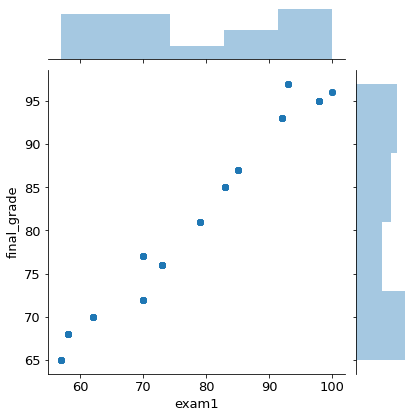

In [33]:
sns.jointplot(x = 'exam1', y = 'final_grade', data = train )

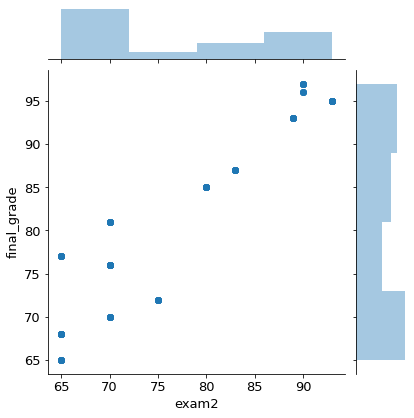

In [34]:
sns.jointplot(x = 'exam2', y = 'final_grade', data = train )

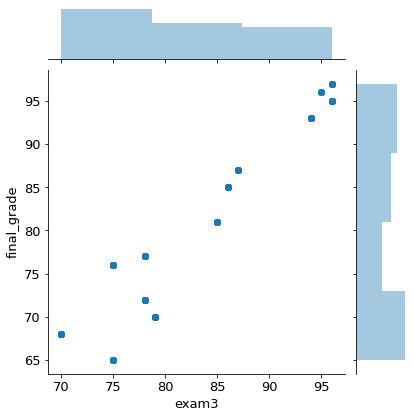

In [35]:
sns.jointplot(x = 'exam3', y = 'final_grade', data = train )

Takeaways:
- is there a stronger correlation between exam 1 and 3 and final grade compared to exam 2?

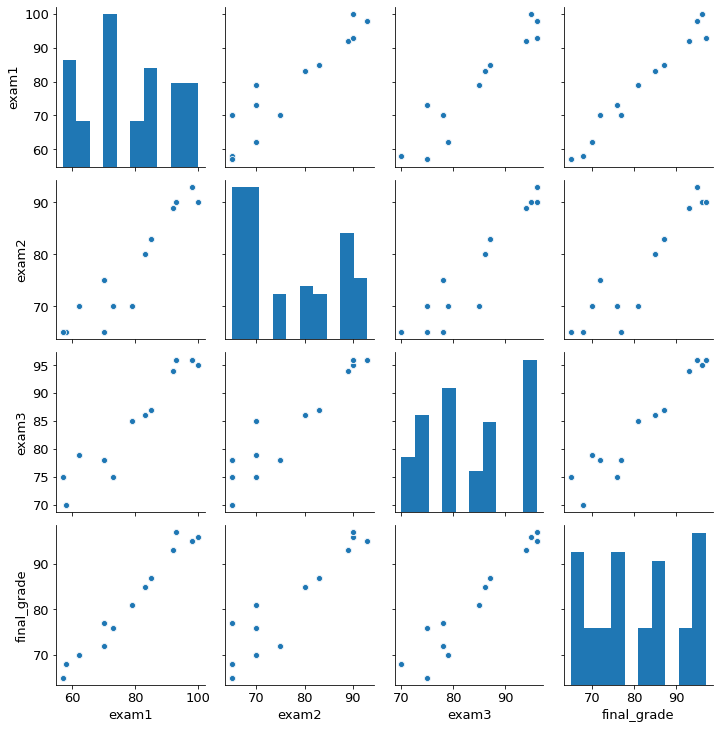

In [36]:
sns.pairplot(train)

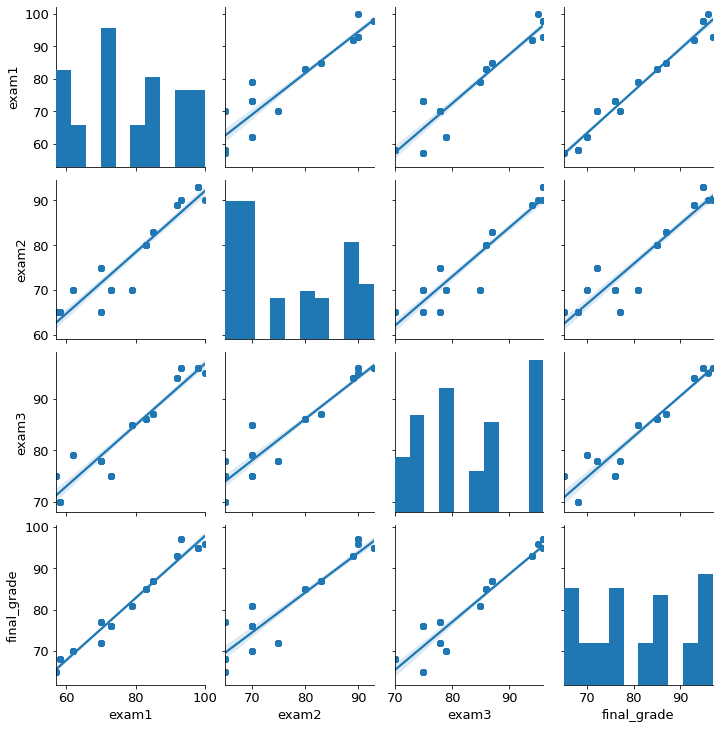

In [37]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot)

In [38]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


<AxesSubplot:>

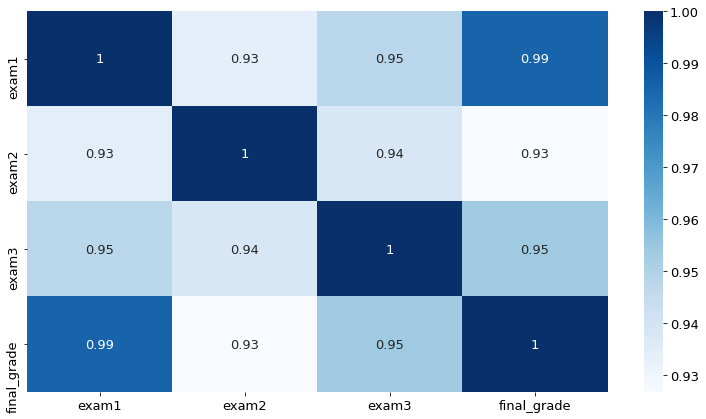

In [39]:
sns.heatmap(train.corr(), cmap = 'Blues', annot = True)

Takeaways:
- exam 2 has least correlation with final grade
- exam 1 has the highest correlation with final grade

# Continuous and Categorical Data

In [40]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


### We dont really have a categorical variable. So, we will self create a categorical variable by turning one of the exam score to letter grade

In [41]:
train['exam1_letter_grade']= pd.cut(train.exam1, bins = [0,70,80, 90, 105], labels = ['F', 'C', 'B', 'A'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,F


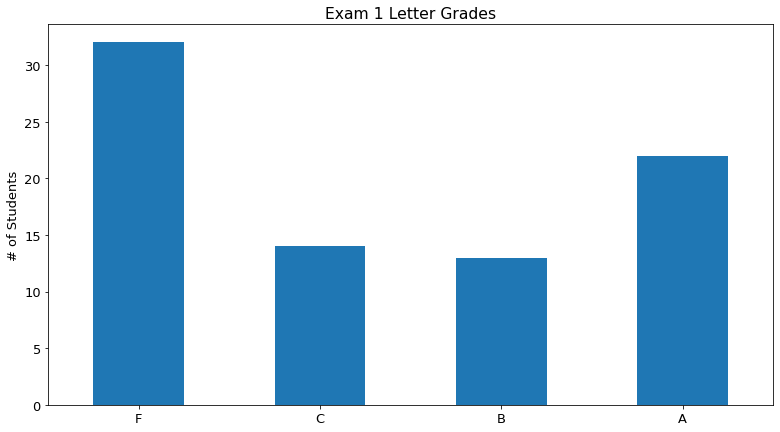

In [47]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar(ylabel = '# of Students', title = 'Exam 1 Letter Grades')
plt.xticks(rotation = 0)
plt.show()

Takeaway:
- there are significantly fewer observations in the B category
    

In [55]:
# make a fake category
np.random.seed(125)
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,Two
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,Two
75,58,65,70,68,F,Two


(0.0, 100.0)

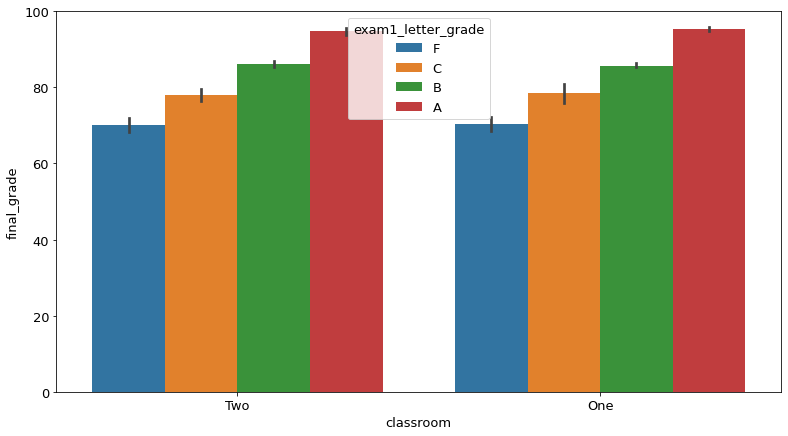

In [57]:
sns.barplot(data = train, y = 'final_grade', x = 'classroom', hue = 'exam1_letter_grade')
plt.ylim(0,100)

takeaway:
- the distribution of grades between classroom are basically the same
- classroom doesnot impact the grades 

**lets run a hypothesis test to check if the classroom in fact doesnot affect the final grades**


alpha = 0.05

$H_0$: There is no difference in final grade between classroom one and two

$H_a$: The is a difference in final gradebetween classroom one and two

In [58]:
from scipy import stats
stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
     train[train.classroom == 'Two'].final_grade,
    equal_var = False
)

Ttest_indResult(statistic=0.14824815473064099, pvalue=0.8825332594672417)

with a p-value of 0.8825, we fail to reject the null hypothesis that there is no difference in final grade between classroom one and classroom two

**takeaways**
- visualize, dont just test
- statistical significance != business significance

<AxesSubplot:xlabel='exam1_letter_grade', ylabel='final_grade'>

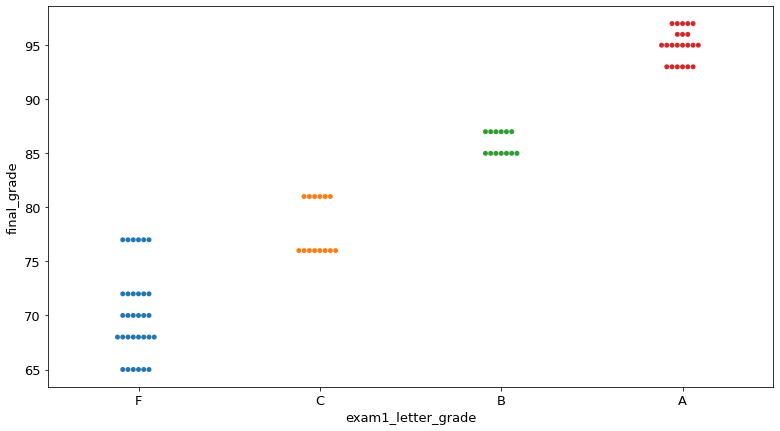

In [59]:
sns.swarmplot(data = train, y = 'final_grade', x = 'exam1_letter_grade')

<AxesSubplot:xlabel='classroom', ylabel='final_grade'>

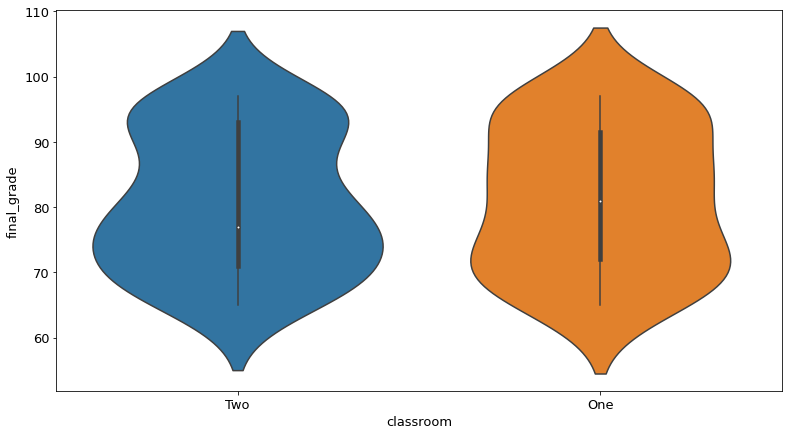

In [61]:
sns.violinplot(data = train, y = 'final_grade', x = 'classroom')

<AxesSubplot:xlabel='final_grade'>

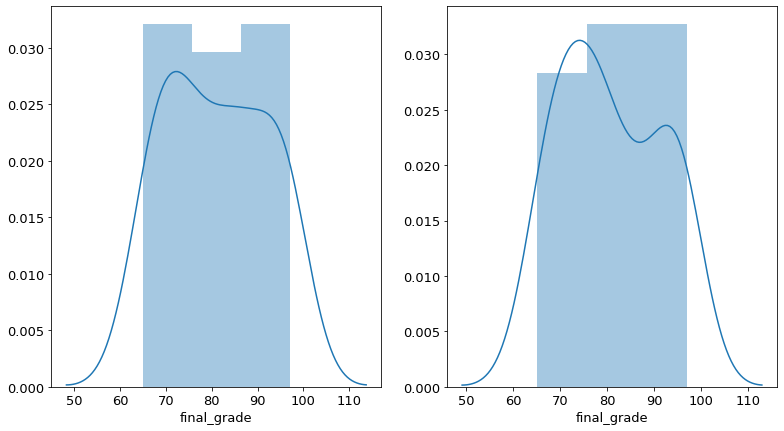

In [63]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

### Categorical and Categorical

In [64]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,Two
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,Two
75,58,65,70,68,F,Two


In [69]:
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize = True)

classroom,One,Two
exam1_letter_grade,,
F,0.197531,0.197531
C,0.049383,0.123457
B,0.098765,0.061728
A,0.123457,0.148148


In [70]:
# better formatting

ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize = True)
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
F,19.8%,19.8%
C,4.9%,12.3%
B,9.9%,6.2%
A,12.3%,14.8%


<AxesSubplot:xlabel='classroom', ylabel='exam1_letter_grade'>

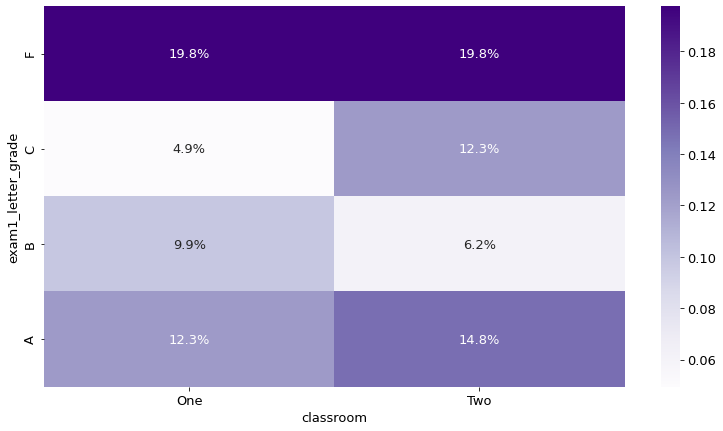

In [80]:
sns.heatmap(ctab, cmap = 'Purples', annot = True, fmt = '.1%')

In [77]:
pd.crosstab( train.classroom,train.exam1_letter_grade, normalize = 'columns') # each column sums to 100%

exam1_letter_grade,F,C,B,A
classroom,,,,
One,0.5,0.285714,0.615385,0.454545
Two,0.5,0.714286,0.384615,0.545455


In [78]:
pd.crosstab( train.classroom,train.exam1_letter_grade, normalize = 'index') # each row sums to 100%

exam1_letter_grade,F,C,B,A
classroom,,,,
One,0.421053,0.105263,0.210526,0.263158
Two,0.372093,0.232558,0.116279,0.279070
